# Matplotlib에서 3차원 플로팅하기

In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

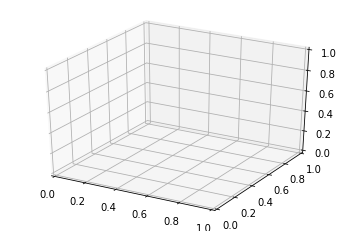

In [3]:
fig = plt.figure()
ax = plt.axes(projection = '3d')

# 3차원 점과 선

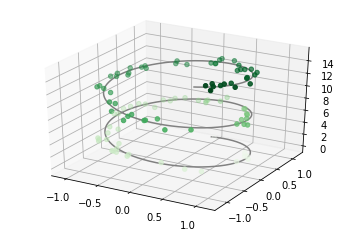

In [4]:
ax = plt.axes(projection = '3d')

# 3차원 선을 위한 데이터
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 3차원 산점도를 위한 데이터
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap = 'Greens')

## 3차원 등고선 플롯

In [5]:
def f(x , y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'z')

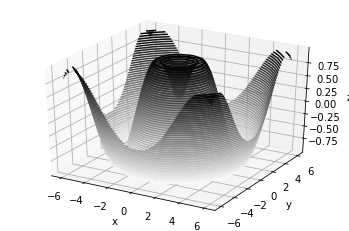

In [6]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 50, cmap = 'binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

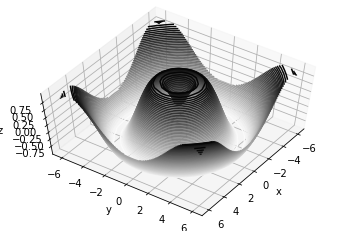

In [7]:
ax.view_init(60, 35)
fig

## 와이어프레임과 표면도

Text(0.5, 0.92, 'wireframe')

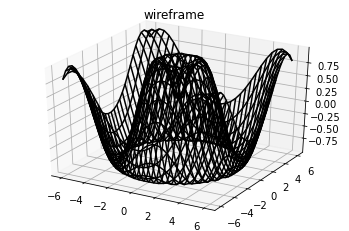

In [8]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
ax.set_title('wireframe')

Text(0.5, 0.92, 'surface')

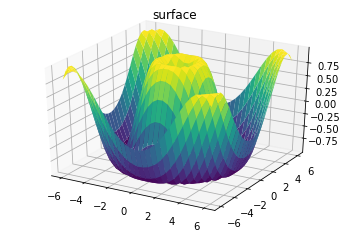

In [9]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.set_title('surface')

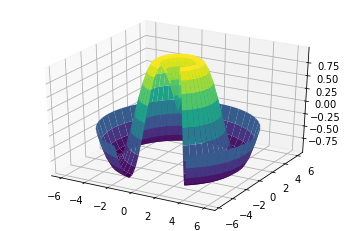

In [10]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')

## 표면 삼각측량법

In [11]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

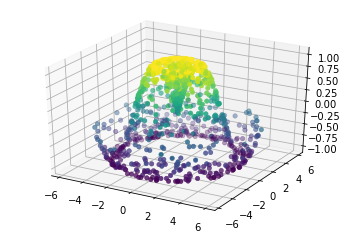

In [12]:
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, c = z, cmap = 'viridis', linewidth = 0.5)

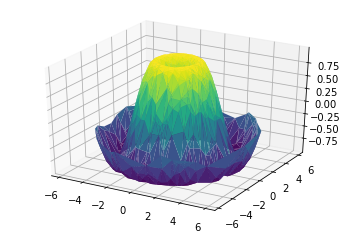

In [13]:
ax = plt.axes(projection = '3d')
ax.plot_trisurf(x, y, z, cmap = 'viridis', edgecolor = 'none')

## 예제 : 뫼비우스의 띠 시각화하기

In [14]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [15]:
phi = 0.5 * theta

In [16]:
# x-y 평면의 반지름
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(r * np.sin(phi))

(-1.0, 1.0)

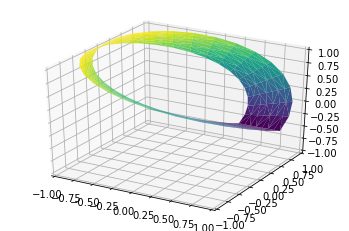

In [17]:
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection = '3d')
ax.plot_trisurf(x, y, z, triangles = tri.triangles, cmap = 'viridis', linewidth = 0.2)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)